In [1]:
import control as ct
import numpy as np
import numpy.linalg as la
from matplotlib import rcParams
import matplotlib.pyplot as plt
import cmath

font_dict={'fontsize': rcParams['axes.titlesize'],
 'fontweight': rcParams['axes.titleweight'],
 'color': rcParams['axes.titlecolor'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

In [2]:
def phase_mag_resp(resp_3d):
    t1 = []
    resp_3d_mag = []
    resp_3d_ph_theta = []
    resp_3d_ph_phi = []
 
    for i in range(len(resp_3d.states[0])):
        t1.append(i)
        x = resp_3d.states[0, i]
        y = resp_3d.states[1, i]
        z = resp_3d.states[2, i]
        
        resp_3d_mag.append(np.linalg.norm(np.array([x,y,z])))
        
        resp_3d_ph_theta.append(np.arctan2(np.sqrt(x**2 + y**2),z))
        resp_3d_ph_phi.append(np.arctan2(y,x))
        
    return t1, resp_3d_mag, resp_3d_ph_theta, resp_3d_ph_phi

def eval_evec(A):
    w, v = la.eig(A)
    print(A)
    print("Eigenvalues and corresponding eigenvectors: ")
    for i in range(A.shape[0]):
        print("Eval-Evec pair ", str(i))
        print(w[i])
        print(v[:,i])
        print("")


In [8]:

A = np.array([[-1, -1, 2], [1, -1, 3], [1, -1, -1]]) # faster real eval
eval_evec(A)
w, v = la.eig(A)
v1, v2, v3 = v[:,0]

[[-1 -1  2]
 [ 1 -1  3]
 [ 1 -1 -1]]
Eigenvalues and corresponding eigenvectors: 
Eval-Evec pair  0
(-2.32826885566861+0j)
[ 0.85688181+0.j  0.30066884+0.j -0.41875029+0.j]

Eval-Evec pair  1
(-0.3358655721656961+1.8229710954111142j)
[0.23194141+0.41437196j 0.80166039+0.j         0.10015628+0.34901059j]

Eval-Evec pair  2
(-0.3358655721656961-1.8229710954111142j)
[0.23194141-0.41437196j 0.80166039-0.j         0.10015628-0.34901059j]



In [20]:
# Projecting plane of the real eigenvalue:
def normal_plane(v1, v2, v3):
    w1 = np.array([-v2, v1, 0])
    w2 = np.array([0, -v3, v2])
    a = 1
    b = v2.real/v1.real
    c = v3.real/v1.real
    return a, b, c

# Plane:
a,b,c = normal_plane(v1, v2, v3)
print(str(a) + "(x-x1) + " + str(b) + "(y-y1)+" + str(c) + "(z-z1) = 0")

1(x-x1) + 0.3508871801610618(y-y1)+-0.48869083775377276(z-z1) = 0


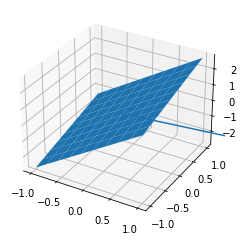

In [21]:
# Plot plane and vector:
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)

X,Y = np.meshgrid(x,y)
Z= -a/c*X -b/c*Y

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(X, Y, Z)
ax.quiver(0, 0, 0, v1, v2, v3, length=5)

In [26]:
# Projecting 3D dynamics to the plane by projecting:
# Pxdot = PAx
def projection(n, p):
    return p - np.dot(n,p)*n

p = np.array([1,2,3])
proj_p = projection(w[0], p)
print(proj_p)

# Next steps: Want to find the A matrix on the plane (going from 3D coordinates to 2D coordinates)!
# Square matrix with real entries and one of the eigenvalues is real, is the corresponding eigenvector also real? Conjectur: Yes!

[ -4.42083586+0.j  -8.84167173+0.j -13.26250759+0.j]
